# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

#determine city based on latitude and longitude
from citipy import citipy

#import json
from config import weather_api_key

#Range of lat and long
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lats_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lats_lng in lats_lngs:
    city = citipy.nearest_city(lats_lng[0], lats_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#setting base url, variables (documentation- https://openweathermap.org/current)

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_L = []
city_name_L = []
clouds_list = []
country_L = []
humidity_L = []
lng_L = []
lat_L = []
temp_L = []
wind_speed_L = []

#looping on cities

for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_L.append(city_id)
            
        city_name = response_json['name']
        city_name_L.append(city_name)
        
        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        country_name = response_json['sys']['country']
        country_L.append(country_name)
        
        humidity = response_json['main']['humidity']
        humidity_L.append(humidity)

        lng = response_json['coord']['lon']
        lng_L.append(lng)

        lat = response_json['coord']['lat']
        lat_L.append(lat)

        temp = response_json['main']['temp']
        temp_L.append(temp)
        
        wind_speed = response_json['wind']['speed']
        wind_speed_L.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("~~~~~~~~~~~~~~~~~~No Record Found~~~~~~~~~~~~~~~~~~")


City Name: rikitea, City ID: 4030556
City Name: shelburne, City ID: 6145890
City Name: torbay, City ID: 6167817
~~~~~~~~~~~~~~~~~~No Record Found~~~~~~~~~~~~~~~~~~
City Name: sorland, City ID: 3137469
City Name: castro, City ID: 3466704
City Name: goderich, City ID: 5962442
City Name: paranaiba, City ID: 3455065
City Name: port blair, City ID: 1259385
~~~~~~~~~~~~~~~~~~No Record Found~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~No Record Found~~~~~~~~~~~~~~~~~~
City Name: katsuura, City ID: 2112309
City Name: mataura, City ID: 6201424
City Name: dikson, City ID: 1507390
City Name: yellowknife, City ID: 6185377
City Name: butaritari, City ID: 2110227
City Name: buin, City ID: 3897774
City Name: hermanus, City ID: 3366880
City Name: ushuaia, City ID: 3833367
City Name: ilulissat, City ID: 3423146
City Name: puerto baquerizo moreno, City ID: 3652758
City Name: sturgis, City ID: 5011428
City Name: de-kastri, City ID: 2126018
City Name: provideniya, City ID: 4031574
City Name: hilo, City ID: 585592

City Name: barrow, City ID: 5880054
City Name: santa rosa, City ID: 1687894
City Name: kaseda, City ID: 1859964
City Name: arraial do cabo, City ID: 3471451
City Name: nagato, City ID: 1899102
City Name: kyshtovka, City ID: 1501000
City Name: carnarvon, City ID: 2074865
City Name: san cristobal, City ID: 3628473
City Name: letterkenny, City ID: 2962961
City Name: inhambane, City ID: 1045114
City Name: paita, City ID: 3694112
City Name: san rafael, City ID: 3836669
City Name: port alfred, City ID: 964432
City Name: ternate, City ID: 1624041
City Name: villarrica, City ID: 3436714
City Name: xichang, City ID: 1789647
City Name: college, City ID: 5859699
City Name: barcelos, City ID: 2742416
City Name: keuruu, City ID: 652977
City Name: faanui, City ID: 4034551
City Name: cabra, City ID: 2520645
~~~~~~~~~~~~~~~~~~No Record Found~~~~~~~~~~~~~~~~~~
City Name: eseka, City ID: 2231881
City Name: choma, City ID: 917748
City Name: ochamchira, City ID: 612652
City Name: bengkulu, City ID: 164915

City Name: burnie, City ID: 2173125
City Name: pacific grove, City ID: 5380437
City Name: makakilo city, City ID: 5850554
City Name: coahuayana, City ID: 4013679
City Name: ust-maya, City ID: 2013918
~~~~~~~~~~~~~~~~~~No Record Found~~~~~~~~~~~~~~~~~~
City Name: freeport, City ID: 5117949
City Name: milos, City ID: 256952
City Name: tateyama, City ID: 1850523
City Name: fujin, City ID: 2037375
City Name: los llanos de aridane, City ID: 2514651
City Name: khromtau, City ID: 609404
City Name: ardakan, City ID: 143073
City Name: kulhudhuffushi, City ID: 1337613
City Name: moerai, City ID: 4034188
City Name: jumla, City ID: 1283285
City Name: larap, City ID: 1707233
City Name: kadiri, City ID: 1268673
City Name: genhe, City ID: 2037252
City Name: la grande, City ID: 5735537
City Name: greenlaw, City ID: 2647954
City Name: boende, City ID: 218680
City Name: taoudenni, City ID: 2450173
City Name: ossora, City ID: 2122389
City Name: coquimbo, City ID: 3893629
City Name: auki, City ID: 2109701

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#creating dataframe 

cities_df = pd.DataFrame({"City ID": city_id_L, "City": city_name_L, "Clouds": clouds_list, 
                          "Country": country_L, "Humidity": humidity_L, "Lat": lat_L, "Lng": lng_L,
                         "Temperature": temp_L, "Wind Speed": wind_speed_L})
cities_df.head() 

,City ID,City,Clouds,Country,Humidity,Lat,Lng,Temperature,Wind Speed
0,4030556,Rikitea,10,PF,75,-23.1203,-134.9692,74.16,14.50
1,6145890,Shelburne,83,CA,54,44.0787,-80.2041,63.21,5.86
2,6167817,Torbay,40,CA,80,47.6666,-52.7314,65.16,17.27
3,3137469,Sørland,98,NO,84,67.6670,12.6934,54.57,9.08
4,3466704,Castro,100,BR,94,-24.7911,-50.0119,48.25,5.61


In [8]:
#convert df to csv file 

cities_df.to_csv("Output/cities_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
cities_df["Humidity"].sort_values(ascending = False)

37     100
499    100
309    100
132    100
97      99
      ... 
225     14
480     14
273     13
325     13
284     11
Name: Humidity, Length: 557, dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

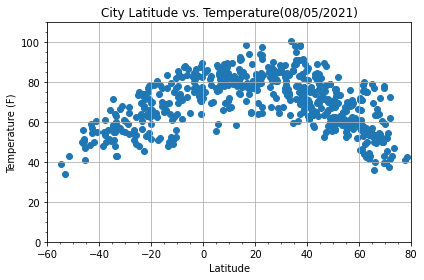

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Temperature(08/05/2021)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 110)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/lat_temp.png")

## Latitude vs. Humidity Plot

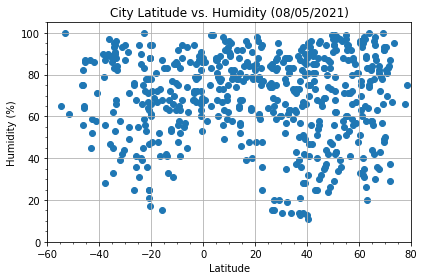

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (08/05/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/lat_humid.png")

## Latitude vs. Cloudiness Plot

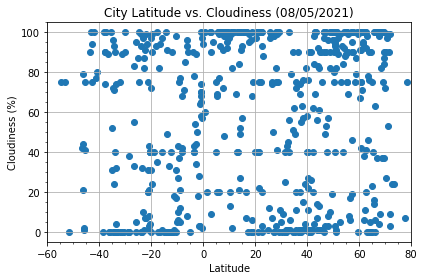

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (08/05/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/lat_clouds.png")

## Latitude vs. Wind Speed Plot

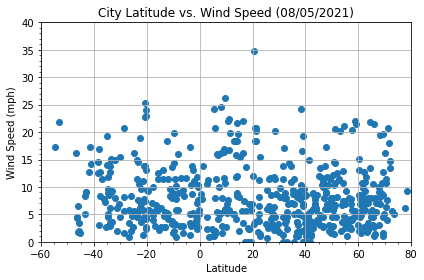

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (08/05/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/lat_wind.png")

## Linear Regression

In [28]:
northern_hemisphere =cities_df[cities_df["Lat"]>=0]
southern_hemisphere =cities_df[cities_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

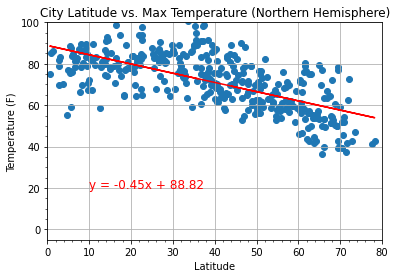

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.show()
plt.savefig("Plots/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

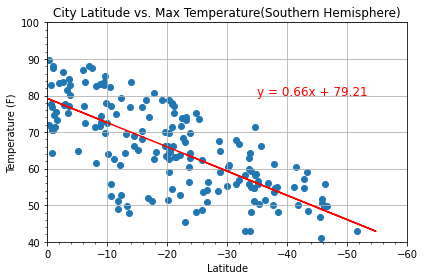

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature(Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/sh_lat_temp_regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

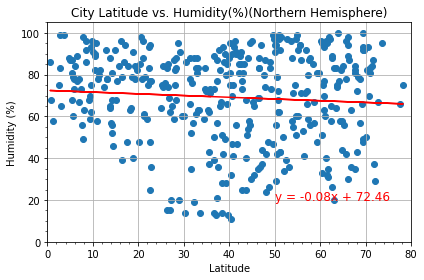

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity(%)(Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

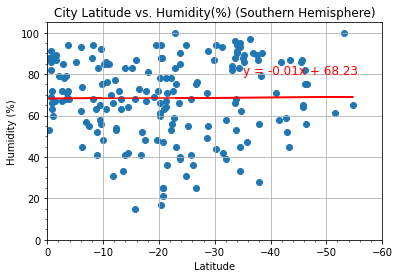

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity(%) (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
#plt.tight_layout()
plt.show()
plt.savefig("Plots/sh_lat_humid_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

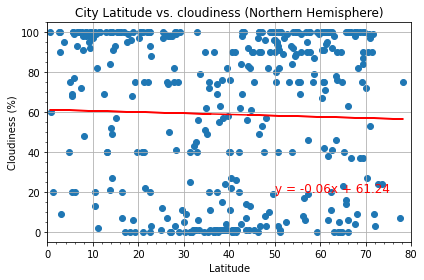

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. cloudiness (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

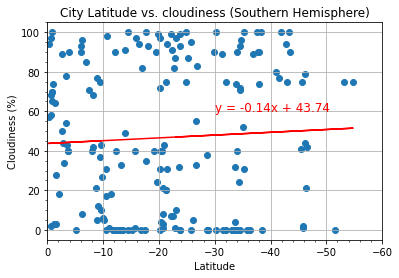

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. cloudiness (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
#plt.tight_layout()
plt.show()
plt.savefig("Plots/sh_lat_clouds_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

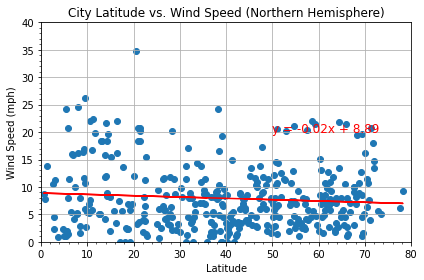

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.tight_layout()
plt.show()
plt.savefig("Plots/nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

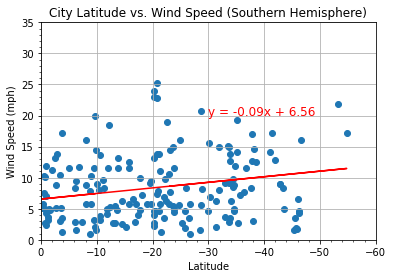

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
#plt.tight_layout()
plt.show()
plt.savefig("Plots/sh_lat_wind_regression.png")